In [ ]:
#LIbraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#take the data from here Kaggle House Prices – Advanced Regression Techniques
train_df = pd.read_csv('train.csv')

print(train_df.head())

print(train_df.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

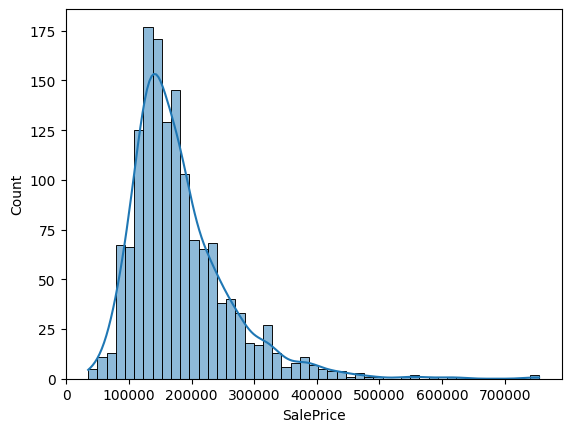

In [ ]:
# Distribution of SalePrice
sns.histplot(train_df['SalePrice'], kde=True)
plt.show()

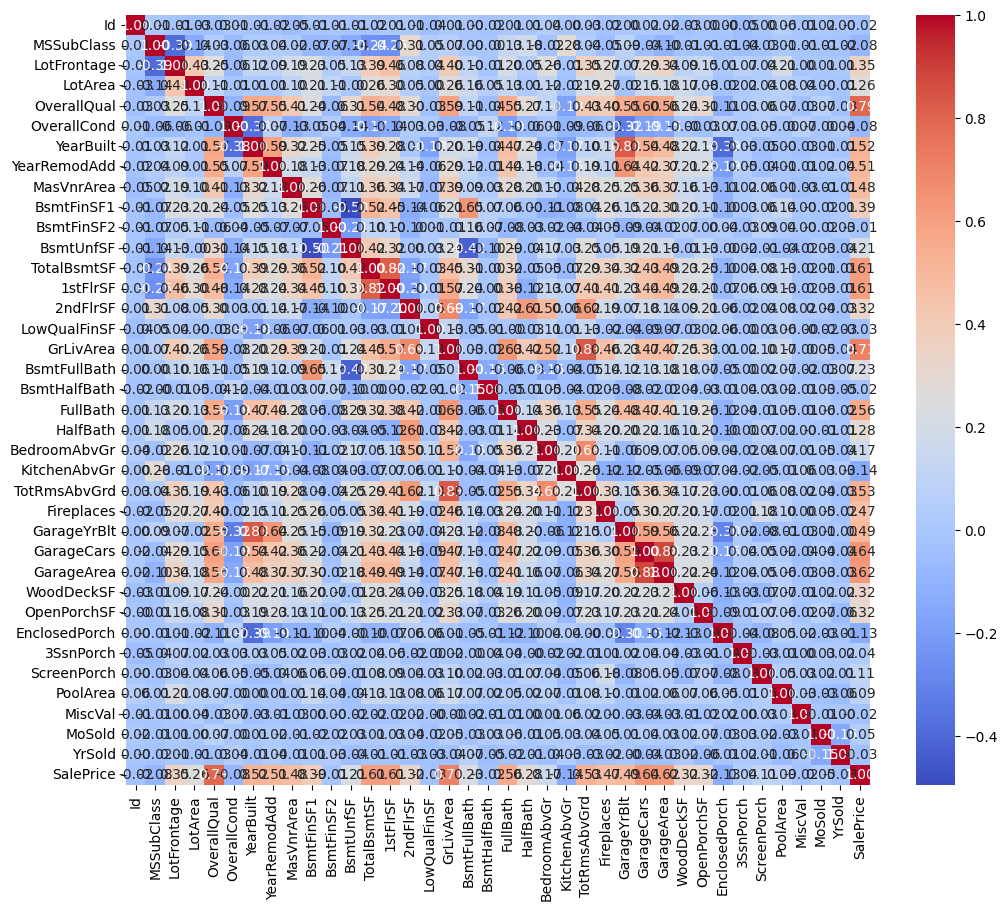

In [ ]:
# Heatmap of correlations of numeric features
numeric_df = train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

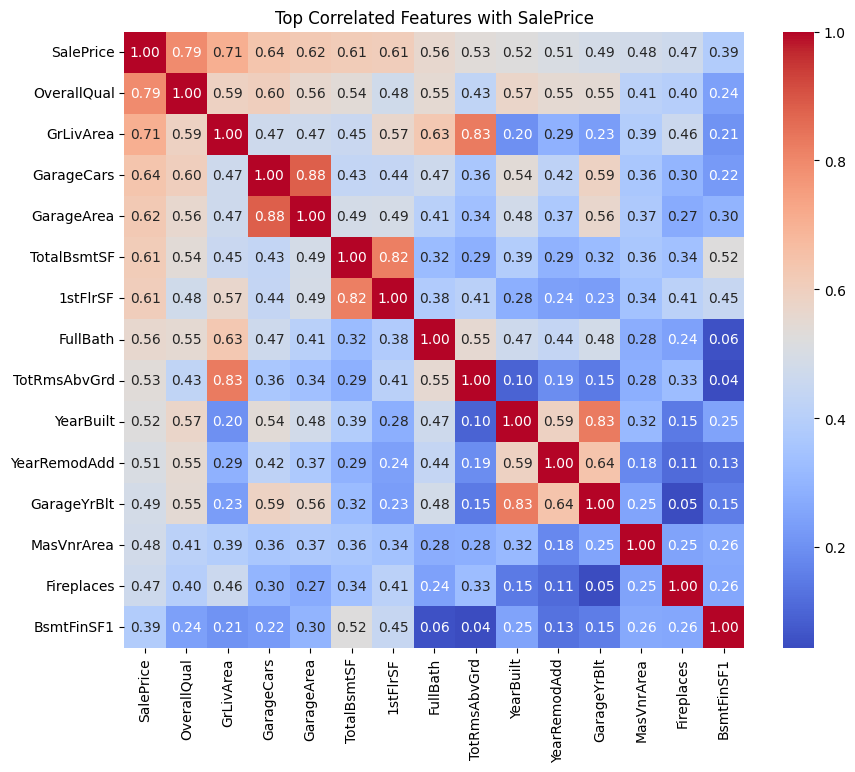

In [ ]:
# Heatmap of top correlated features with SalePrice
corr = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

top_features = corr.head(15).index

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()


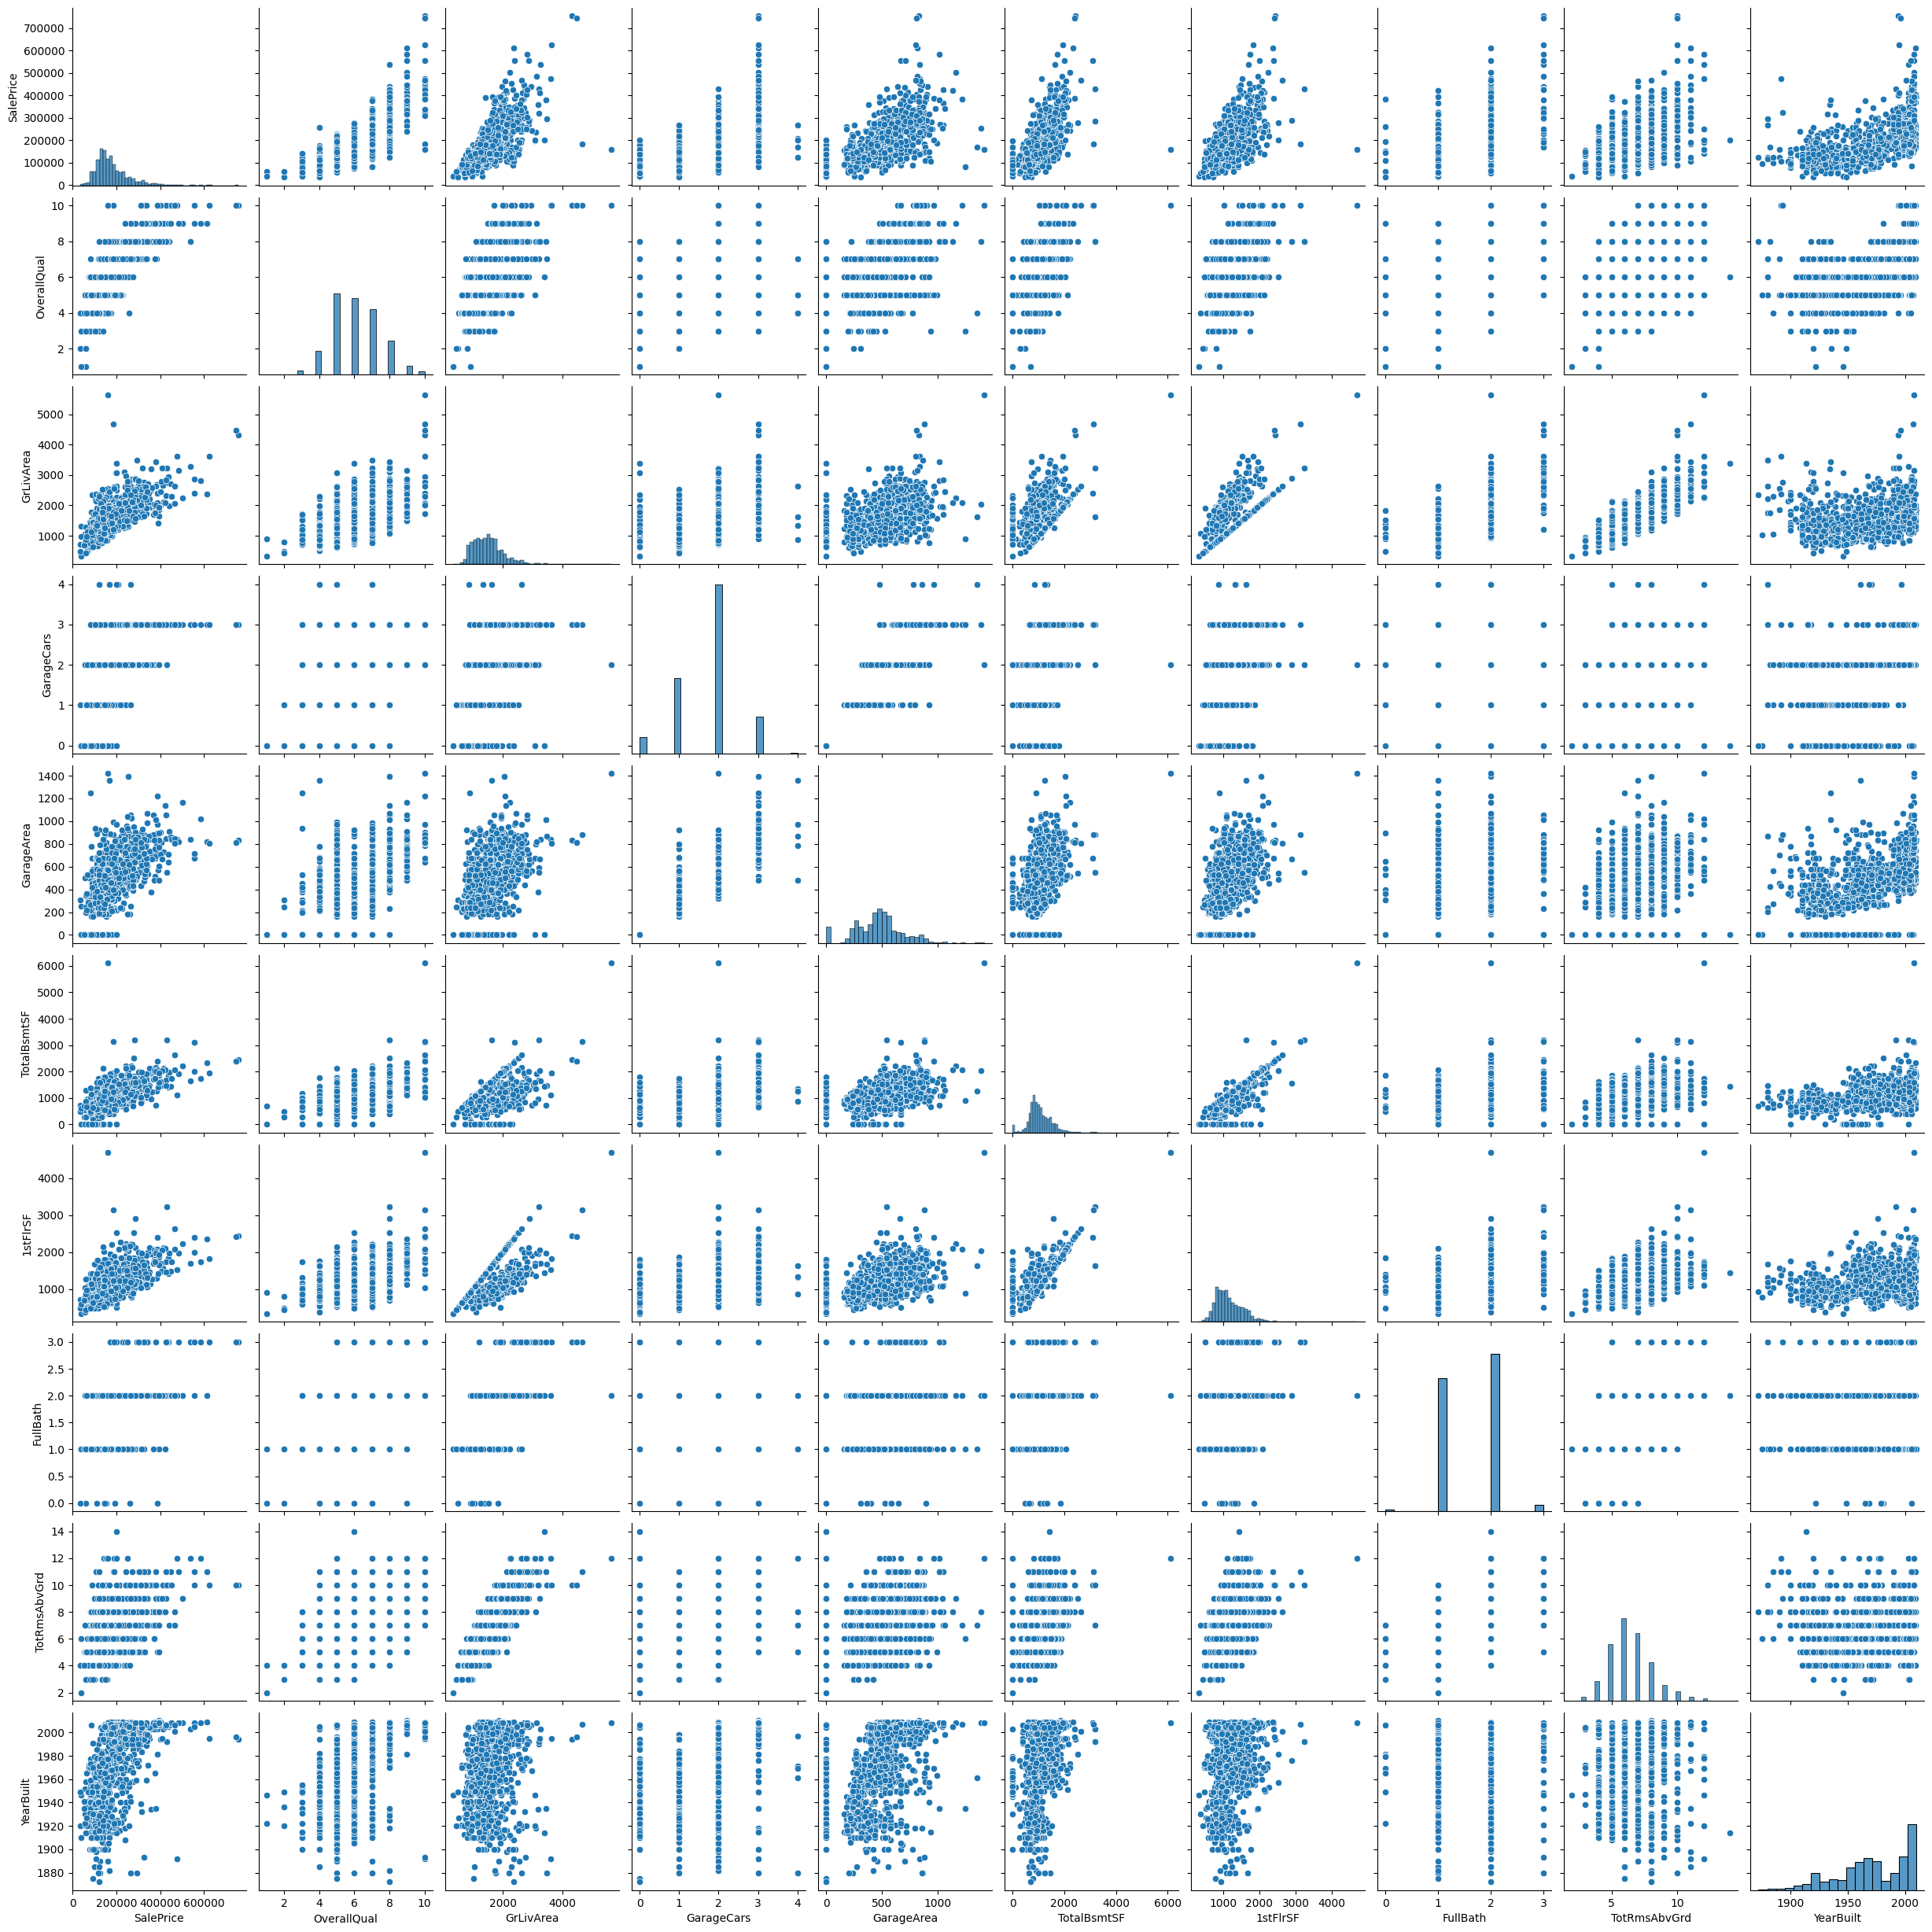

In [13]:
# Scatter plot for top correlated features
numeric_df = train_df.select_dtypes(include=[np.number])
top_features = numeric_df.corr()['SalePrice'].sort_values(ascending=False).head(10).index
sns.pairplot(numeric_df[top_features])
plt.show()

In [ ]:
# Data Checking 
train_df.nunique()


Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [ ]:
#Data Preprocessing
train_df.drop(columns=['Id', 'Street', 'Utilities'], inplace=True)

cat_cols = train_df.select_dtypes(include=['object']).columns
num_cols = train_df.select_dtypes(include=[np.number]).columns

train_df[cat_cols] = train_df[cat_cols].fillna('None')

for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [21]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [25]:
#One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)


In [26]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [27]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [28]:
x = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.001, max_iter=10000),
    'ElasticNet Regression': ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}, RMSE: {rmse:.4f}")

Linear Regression - MSE: 0.0314, R2: 0.8318, RMSE: 0.1772
Ridge Regression - MSE: 0.0288, R2: 0.8454, RMSE: 0.1698
Lasso Regression - MSE: 0.0254, R2: 0.8639, RMSE: 0.1594
ElasticNet Regression - MSE: 0.0261, R2: 0.8601, RMSE: 0.1615
Decision Tree - MSE: 0.0415, R2: 0.7775, RMSE: 0.2038
Random Forest - MSE: 0.0226, R2: 0.8787, RMSE: 0.1504


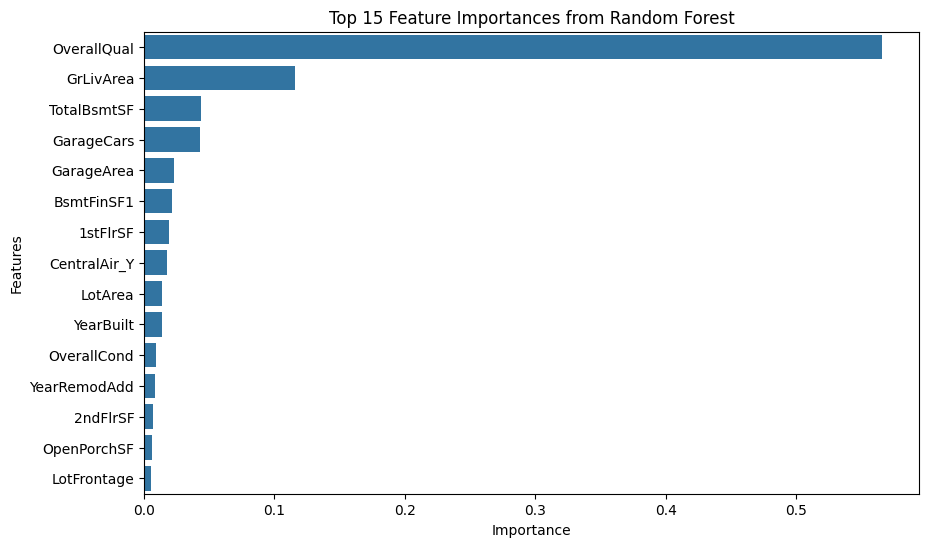

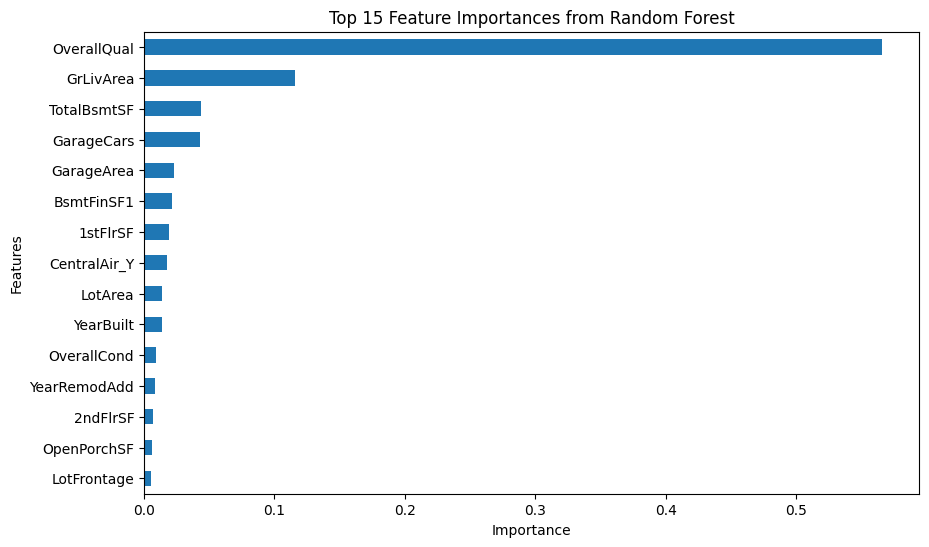

In [48]:
# Random Forest feature importance
rf_model_random = models['Random Forest']
feature_importances = pd.Series(rf_model_random.feature_importances_, index=x.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

#using sns to plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


#using plt to plot feature importance
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

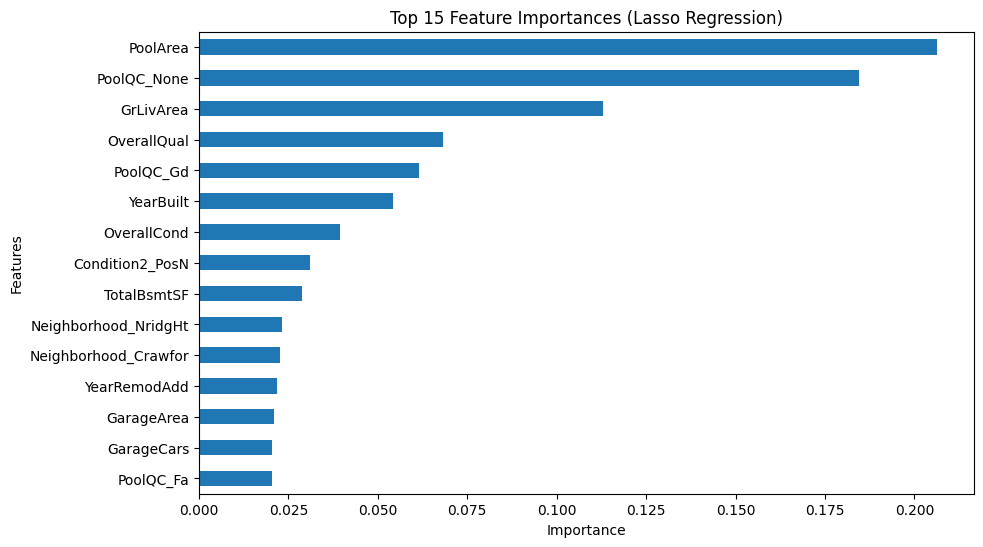

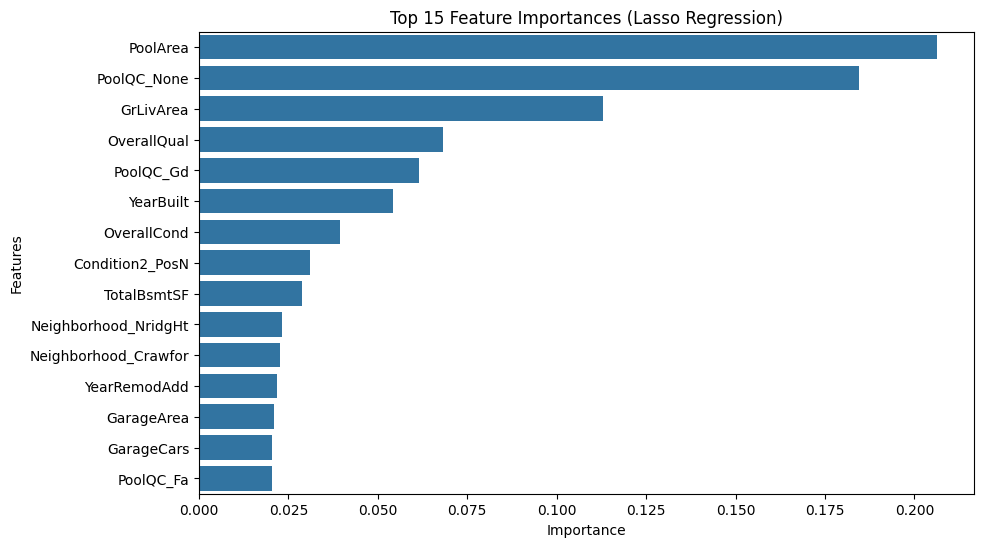

In [49]:
rf_model_lasso = models['Lasso Regression']
lasso_feature_importances = pd.Series(rf_model_lasso.coef_, index=x.columns)
top_lasso_features = lasso_feature_importances.abs().sort_values(ascending=False).head(15)

# Plot using plt
plt.figure(figsize=(10,6))
top_lasso_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Lasso Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#plot using sns
plt.figure(figsize=(10,6))
sns.barplot(x=top_lasso_features.values, y=top_lasso_features.index)
plt.title("Top 15 Feature Importances (Lasso Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


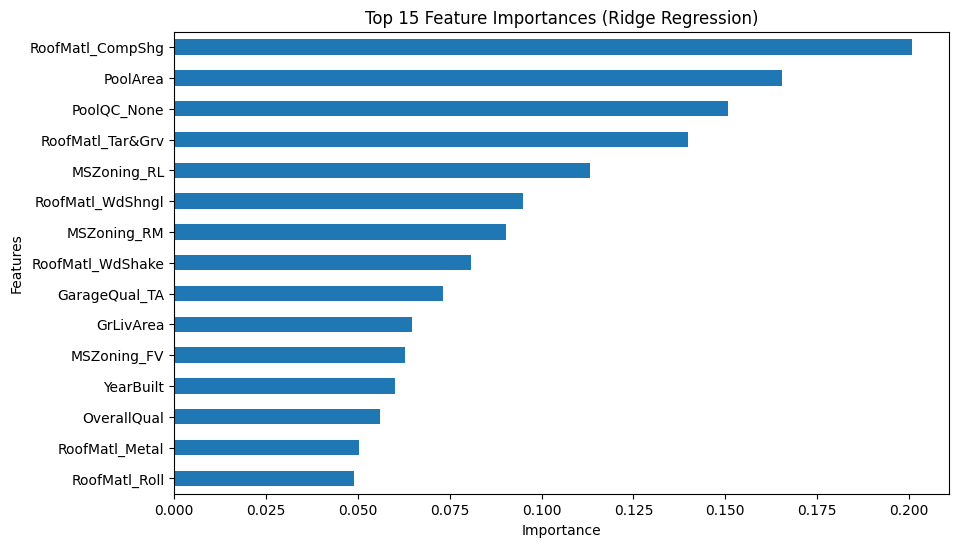

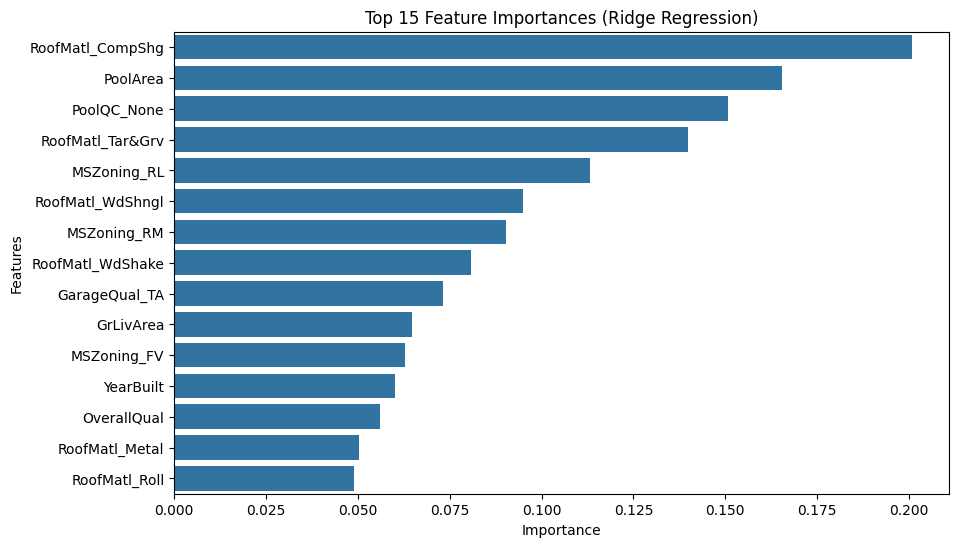

In [50]:
rf_model_Ridge = models['Ridge Regression']
Ridge_feature_importances = pd.Series(rf_model_Ridge.coef_, index=x.columns)
top_Ridge_features = Ridge_feature_importances.abs().sort_values(ascending=False).head(15)

# Plot using plt
plt.figure(figsize=(10,6))
top_Ridge_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Ridge Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#plot using sns
plt.figure(figsize=(10,6))
sns.barplot(x=top_Ridge_features.values, y=top_Ridge_features.index)
plt.title("Top 15 Feature Importances (Ridge Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

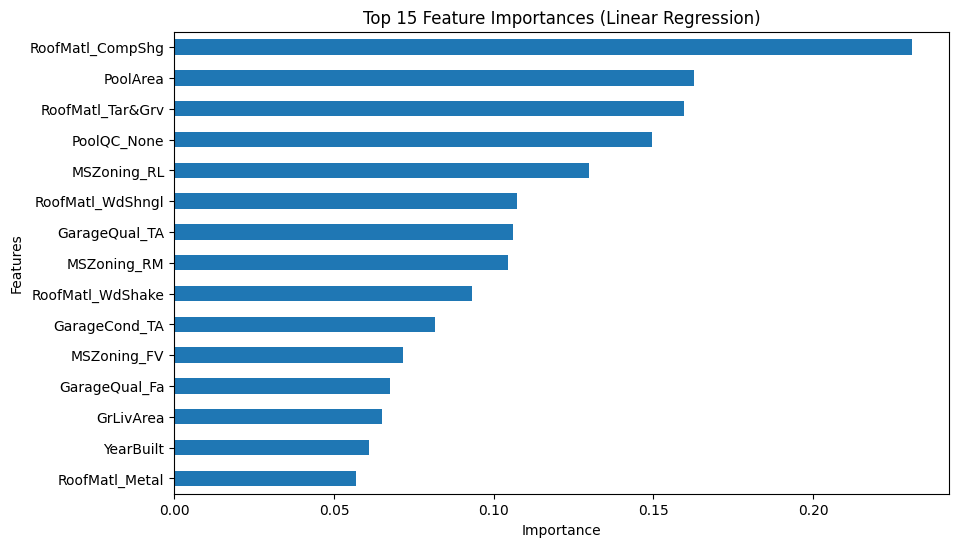

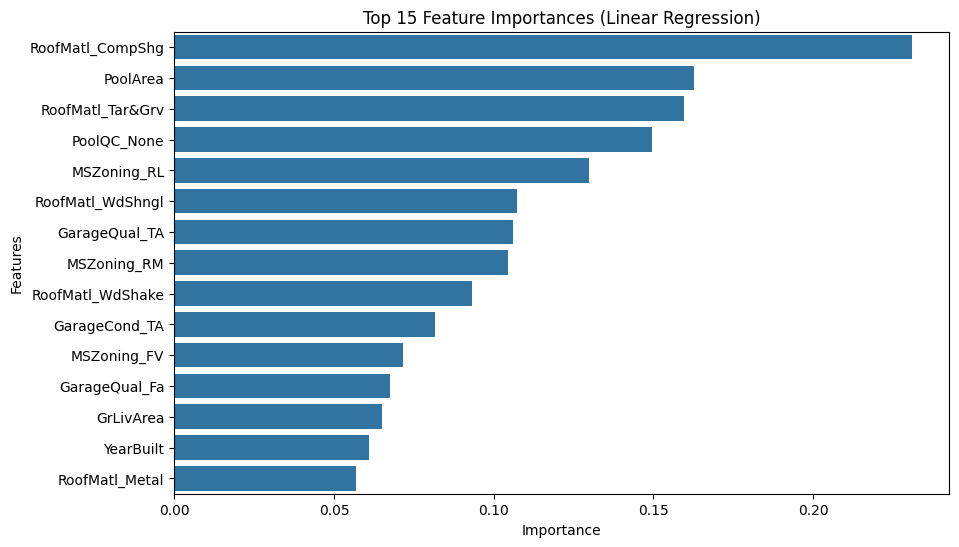

In [52]:
rf_model_Linear = models['Linear Regression']
Linear_feature_importances = pd.Series(rf_model_Linear.coef_, index=x.columns)
top_Linear_features = Linear_feature_importances.abs().sort_values(ascending=False).head(15)
# Plot using plt
plt.figure(figsize=(10,6))
top_Linear_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Linear Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
#plot using sns
plt.figure(figsize=(10,6))
sns.barplot(x=top_Linear_features.values, y=top_Linear_features.index)
plt.title("Top 15 Feature Importances (Linear Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

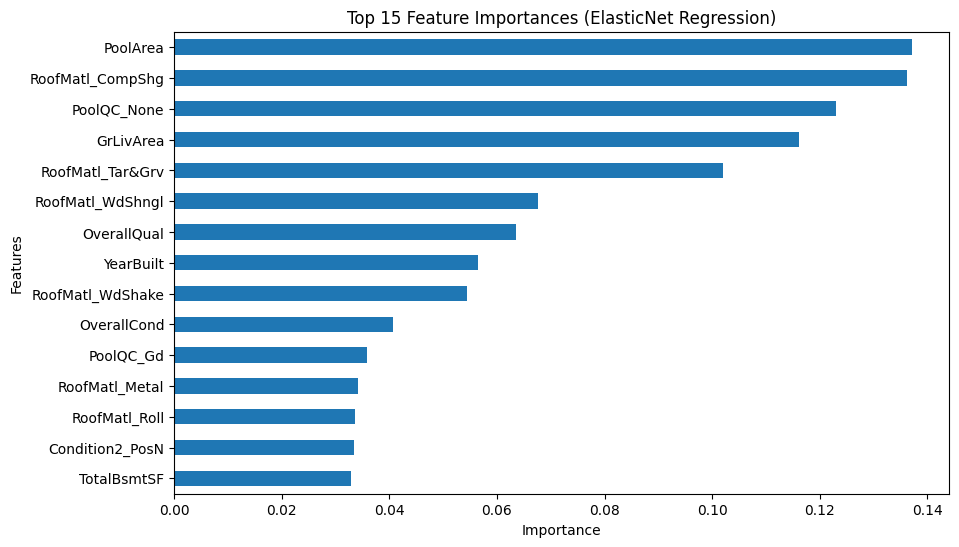

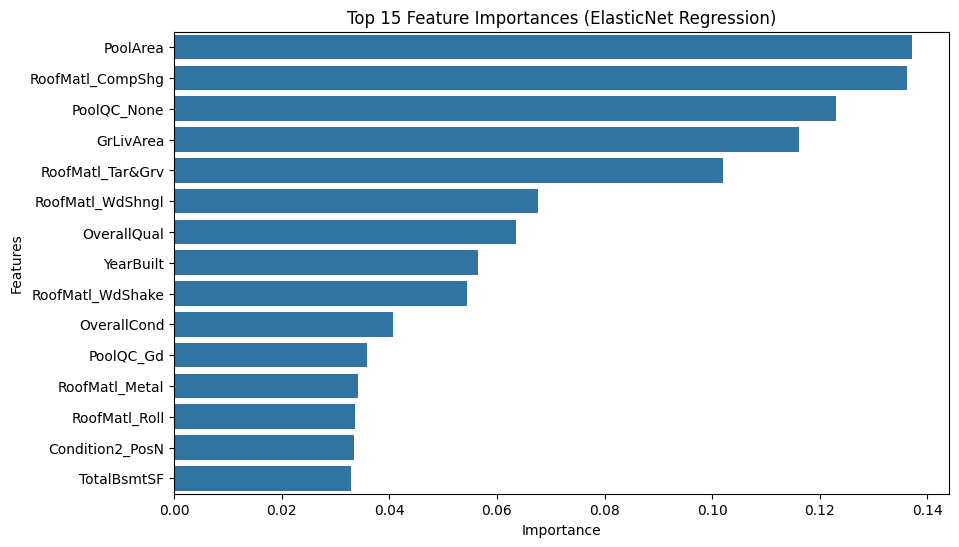

In [53]:
rf_model_ElasticNet = models['ElasticNet Regression']
ElasticNet_feature_importances = pd.Series(rf_model_ElasticNet.coef_, index=x.columns)
top_ElasticNet_features = ElasticNet_feature_importances.abs().sort_values(ascending=False).head(15)
# Plot using plt
plt.figure(figsize=(10,6))  
top_ElasticNet_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (ElasticNet Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#plot using sns
plt.figure(figsize=(10,6))
sns.barplot(x=top_ElasticNet_features.values, y=top_ElasticNet_features.index)
plt.title("Top 15 Feature Importances (ElasticNet Regression)")
plt.xlabel("Importance")        
plt.ylabel("Features")
plt.show()


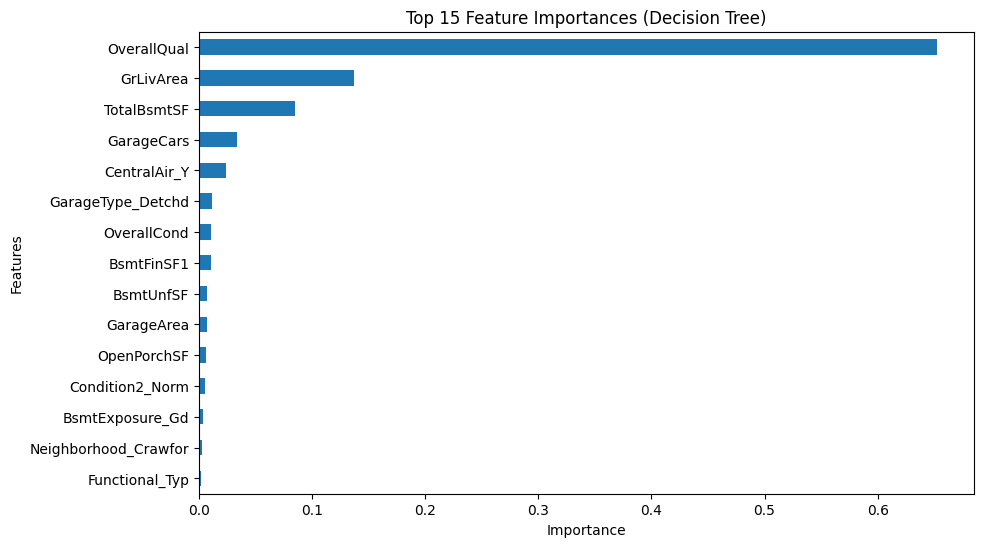

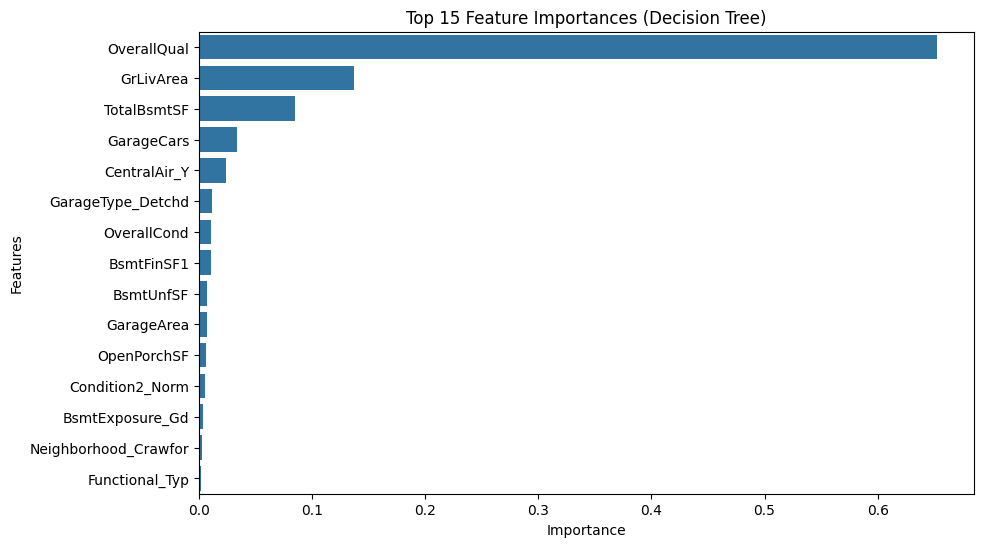

In [54]:
rf_model_Decision = models['Decision Tree']
Decision_feature_importances = pd.Series(rf_model_Decision.feature_importances_, index=x.columns)
top_Decision_features = Decision_feature_importances.sort_values(ascending=False).head(15)

# Plot using plt
plt.figure(figsize=(10,6))
top_Decision_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Decision Tree)")
plt.xlabel("Importance")        
plt.ylabel("Features")
plt.show()

#plot using sns
plt.figure(figsize=(10,6))
sns.barplot(x=top_Decision_features.values, y=top_Decision_features.index)
plt.title("Top 15 Feature Importances (Decision Tree)") 
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


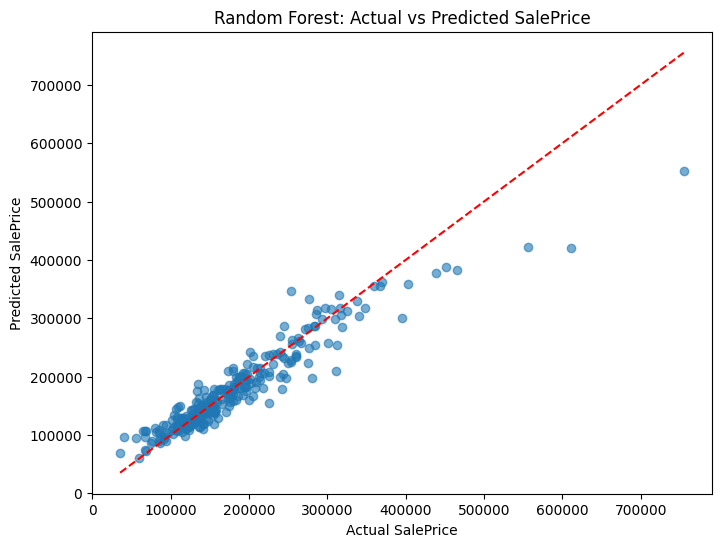

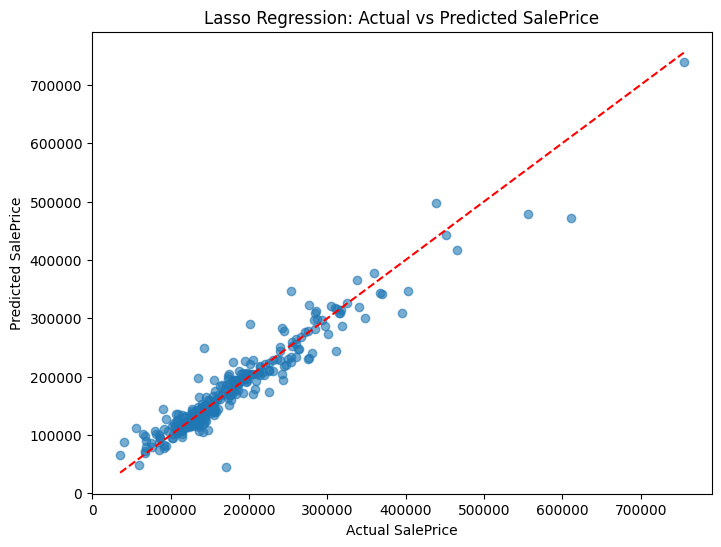

In [57]:

# Random Forest predictions
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_original = np.expm1(y_pred_rf)
y_test_original = np.expm1(y_test)  # reverse log-transform if applied

plt.figure(figsize=(8,6))
plt.scatter(y_test_original, y_pred_rf_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Actual vs Predicted SalePrice")
plt.show()

# Lasso Regression predictions
lasso_model = models['Lasso Regression']
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_lasso_original = np.expm1(y_pred_lasso)

plt.figure(figsize=(8,6))
plt.scatter(y_test_original, y_pred_lasso_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Lasso Regression: Actual vs Predicted SalePrice")
plt.show()
